### Reinforcement Learning - Resource Manager

Version 1.7:

- Changed environment, Rendering with images
- Added function to save Observation, Q-Table, Plot and Hyperparameters




### Imports

In [3]:
import gym
import numpy as np
from gym.envs.registration import register
import matplotlib.pyplot as plt

### Environment

In [4]:
from environment.ResourceManagerEnvironment_v1_7 import ResourceManagerEnv
from agent.QLearning import QLearningAgent

In [5]:
register(
    id='Resource-Manager-v1-7',
    entry_point='environment.ResourceManagerEnvironment_v1_7:ResourceManagerEnv',
    kwargs={
        'grid_size': 20,           #set to desired grid size
        'window_size': 400,        #set to desired window size
        'num_water_resources': 20,  #set to desired number of water resources
        'render_mode': 'rgb_array'     #set to desired render mode ('human' or 'rgb_array')
    },
    max_episode_steps=1000,
)


In [6]:

env = gym.make('Resource-Manager-v1-7')

#Hyperparameters:

learning_rate=0.1
discount_factor=0.9
exploration_prob=1.0
epsilon_decay=0.995
replay_buffer_size=1000
batch_size=32

agent = QLearningAgent(env, learning_rate, discount_factor, exploration_prob, epsilon_decay)
num_episodes = 500

episode_rewards = []
episode_water_resources = []


for episode in range(num_episodes):
    observation = env.reset()
    total_reward = 0

    if episode == 0:
        inital_observation = observation

    while True:

        #select action using the Q-learning agent
        action = agent.select_action(observation)
        # Take a step in the environment
        next_observation, reward, done, _, _ = env.step(action)
    
        total_reward += reward

        #update the Q-table
        agent.update_q_table(observation, action, reward, next_observation)  

        observation = next_observation

        if done:
            break

    episode_rewards.append(total_reward)
    episode_water_resources.append(env.water_resource)

    print(f"Episode {episode + 1}, Total Reward: {total_reward}, Total Water Resource: {env.water_resource}")

/Users/flaviopfister/anaconda3/envs/reinforcedlearning/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (20, 20)
  logger.warn(
/Users/flaviopfister/anaconda3/envs/reinforcedlearning/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/Users/flaviopfister/anaconda3/envs/reinforcedlearning/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/Users/flaviopfi

agent_position: [[13  3]]
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent_position: []
agent

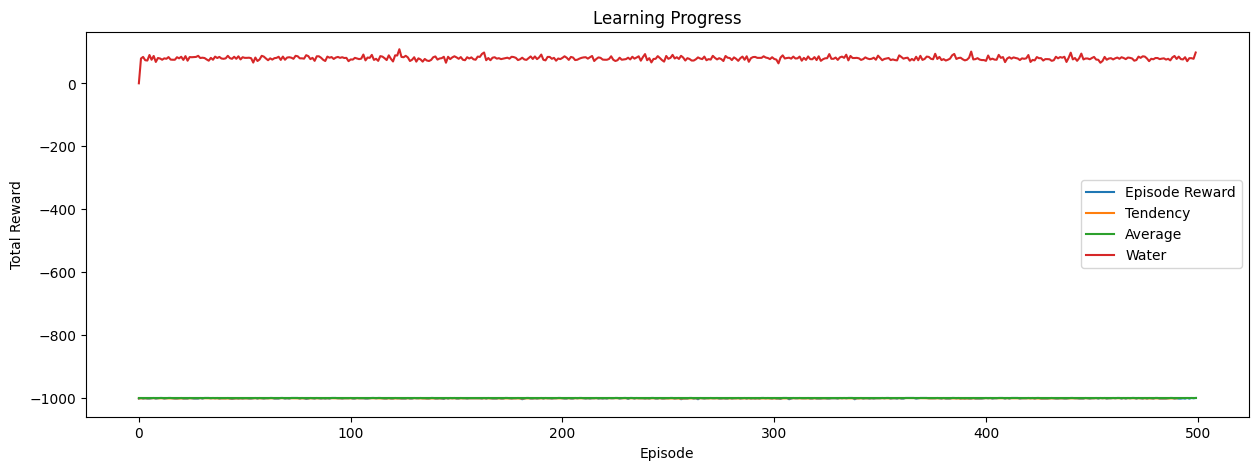

In [7]:
#Plot the total rewards
plt.figure(figsize=(15,5))
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Learning Progress')
#plot tendency curve
plt.plot(np.convolve(episode_rewards, np.ones((10,))/10, mode='valid'))
#plot average
plt.plot(np.ones(len(episode_rewards))*np.mean(episode_rewards))
plt.plot(episode_water_resources)
plt.legend(['Episode Reward', 'Tendency', 'Average', 'Water'])
plt.show()


In [8]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
observation

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.],
       [0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0.],
       [0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0

In [9]:
inital_observation[0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.],
       [0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0.],
       [0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0

In [10]:
final_q_table = agent.q_table
final_q_table

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [9.90753004, 5.58976264, 3.5080018 , 6.906786  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [9.90753004, 5.58976264, 3.5080018 , 6.906786  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        ,

In [11]:
# function to save the results
def save_results():
    import os
    from datetime import datetime
    now = datetime.now()
    dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
    folder_name = f"Results_{dt_string}"
    os.mkdir(folder_name)
    #save the observation in a text file
    np.savetxt(f"{folder_name}/observation.txt", inital_observation[0], fmt="%s")
    #save the q-table in a text file
    np.savetxt(f"{folder_name}/q_table.txt", final_q_table, fmt="%s")

    #Subfolder for the images
    os.mkdir(f"{folder_name}/Plots")
    #save the plot of the total rewards
    plt.figure(figsize=(15,5))
    plt.plot(episode_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Learning Progress')
    #plot tendency curve
    plt.plot(np.convolve(episode_rewards, np.ones((10,))/10, mode='valid'))
    #plot average
    plt.plot(np.ones(len(episode_rewards))*np.mean(episode_rewards))
    plt.plot(episode_water_resources)
    plt.legend(['Episode Reward', 'Tendency', 'Average', 'Water'])
    plt.savefig(f"{folder_name}/Plots/learning_progress.png")

    # Subfolder for Hyperparameters
    os.mkdir(f"{folder_name}/Hyperparameters")
    #save the hyperparameters in a text file

    with open(f"{folder_name}/Hyperparameters/hyperparameters.txt", "w") as text_file:
        text_file.write(f"learning_rate={learning_rate}\n")
        text_file.write(f"discount_factor={discount_factor}\n")
        text_file.write(f"exploration_prob={exploration_prob}\n")
        text_file.write(f"epsilon_decay={epsilon_decay}\n")
        text_file.write(f"replay_buffer_size={replay_buffer_size}\n")
        text_file.write(f"batch_size={batch_size}\n")

    print("Save Complete")    
    return


Save Complete


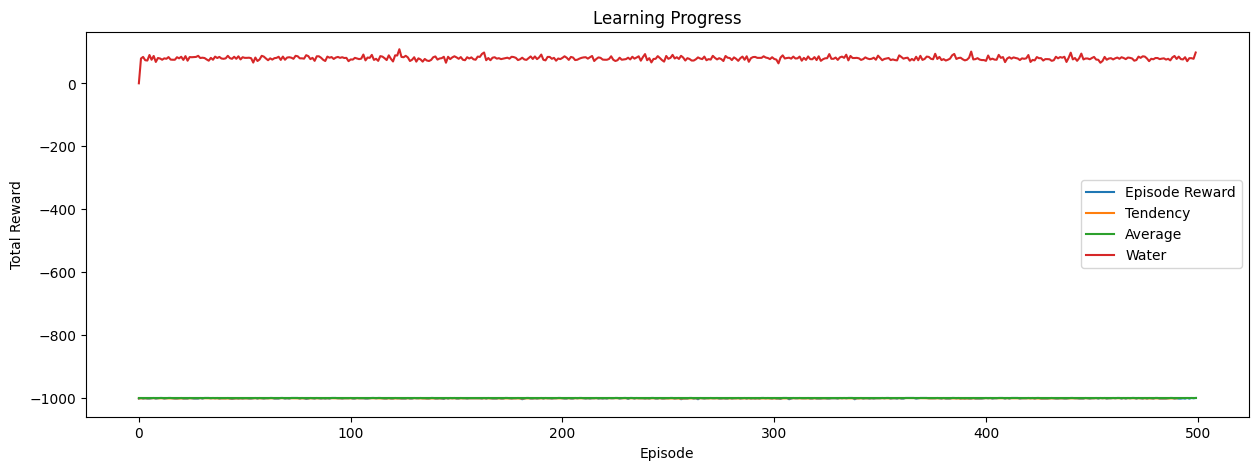

In [12]:
save_results()